# Metric
使用keras.metrics.Accuracy物件的update_state + result()方法來計算準確度

In [5]:
import tensorflow as tf
import numpy as np
m = tf.keras.metrics.Accuracy() 
_ = m.update_state([1, 2, 3, 4], [0, 2, 3, 4]) 

print(m.result().numpy()) 

# m.reset_states() 不重製的話  會接續下去算，也就是[1, 2, 3, 4, 1, 2, 3, 4] vs [0, 2, 3, 4, 0, 0, 3, 4]
_ = m.update_state([1, 2, 3, 4], [0, 0, 3, 4]) 

# sample weight = 0 代表不計入此sample
_ = m.update_state([1, 2, 3, 4], [0, 2, 3, 4], 
                    sample_weight=[1, 1, 0, 0]) 
print(m.result().numpy()) 


0.75
0.6


In [2]:
type(m)

tensorflow.python.keras.metrics.Accuracy

In [3]:
m = tf.keras.metrics.CategoricalAccuracy() 
# 前2個array但代表真實數據為第2類,第1類；後2筆數據代表預測機率最高的是第幾類，分別是第1類與第2類
# _ = m.update_state([[0, 0, 1], [0, 1, 0]], [[0.1, 0.9, 0.8], 
#                     [0.05, 0.95, 0]]) 
_ = m.update_state([[0, 0, 1], [0, 1, 0]], [[0.1, 0.1, 0.8], 
                    [0.5, 0.5, 0]]) 
print(m.result().numpy()) 

#m.reset_states() 

_ = m.update_state([[0, 1,0], [0, 1, 0]], [[0.1, 0.9, 0.8], 
                    [0.05, 0.95, 0]]) 
print(m.result().numpy()) 

0.5
0.75


In [4]:
m = tf.keras.metrics.SparseCategoricalAccuracy() 
# _ = m.update_state([[2], [1]], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]]) 
# _ = m.update_state([2,1], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]]) 
_ = m.update_state([1,1], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]]) 

print(m.result().numpy())

#m.reset_states() 

_ = m.update_state([[0], [0]], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]]) 
print(m.result().numpy())

1.0
0.5


In [5]:
m = tf.keras.metrics.CategoricalCrossentropy()
m.update_state([[0, 1, 0], [0, 0, 1]],
               [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
'''
# EPSILON = 1e-7, y = y_true, y` = y_pred
# y` = clip_ops.clip_by_value(output, EPSILON, 1. - EPSILON)
# y` = [[0.05, 0.95, EPSILON], [0.1, 0.8, 0.1]]

# xent = -sum(y * log(y'), axis = -1)
#      = ((-log 0.95), (-log 0.1))
#      = [0.051, 2.302]
# Reduced mean = (0.051 + 2.302) / 2
'''
print(m.result().numpy()) 


#m.reset_states() 

m.update_state([[0, 1, 0], [0, 1, 0]],
               [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])

print(m.result().numpy()) 

1.1769392
0.65707886


In [6]:
# 計算 cross entropy
# 注意加了Sparse代表原始數據沒有做one hot encoding
m = tf.keras.metrics.SparseCategoricalCrossentropy()
m.update_state(
  [1, 2],
  [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])

print(m.result().numpy())  

#m.reset_states() 

m.update_state(
  [0, 0],
  [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])

print(m.result().numpy())  

1.1769392
1.913049


# DNN神經網路訓練及驗證(Keras版本)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


#keras.optimizers.Adagrad(learning_rate=0.01)
#keras.optimizers.Adam(learning_rate=0.01)
#keras.optimizers.RMSprop(learning_rate=0.01)

# provide labels as one_hot representation => tf.keras.losses.CategoricalCrossentropy
# provide labels as integers => tf.keras.losses.SparseCategoricalCrossentropy 
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

(60000, 784)   (60000,)
(10000, 784)   (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [2]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)

Epoch 1/100
165/165 - 0s - loss: 3.2348 - accuracy: 0.7330 - val_loss: 0.8849 - val_accuracy: 0.8460
Epoch 2/100
165/165 - 0s - loss: 0.6075 - accuracy: 0.8750 - val_loss: 0.5154 - val_accuracy: 0.8899
Epoch 3/100
165/165 - 0s - loss: 0.3743 - accuracy: 0.9108 - val_loss: 0.4149 - val_accuracy: 0.9065
Epoch 4/100
165/165 - 0s - loss: 0.2713 - accuracy: 0.9288 - val_loss: 0.3534 - val_accuracy: 0.9192
Epoch 5/100
165/165 - 0s - loss: 0.2124 - accuracy: 0.9405 - val_loss: 0.3379 - val_accuracy: 0.9226
Epoch 6/100
165/165 - 0s - loss: 0.1763 - accuracy: 0.9500 - val_loss: 0.3109 - val_accuracy: 0.9300
Epoch 7/100
165/165 - 0s - loss: 0.1491 - accuracy: 0.9558 - val_loss: 0.2952 - val_accuracy: 0.9339
Epoch 8/100
165/165 - 0s - loss: 0.1308 - accuracy: 0.9606 - val_loss: 0.2871 - val_accuracy: 0.9343
Epoch 9/100
165/165 - 0s - loss: 0.1140 - accuracy: 0.9646 - val_loss: 0.2831 - val_accuracy: 0.9383
Epoch 10/100
165/165 - 0s - loss: 0.0999 - accuracy: 0.9687 - val_loss: 0.2732 - val_accura

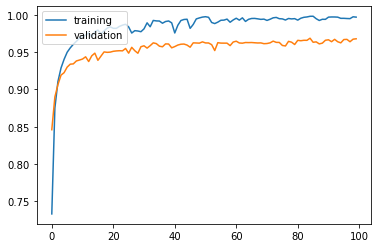

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [4]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 0s 366us/step - loss: 0.3840 - accuracy: 0.9660
[0.38398343324661255, 0.9660000205039978]
